# Customer Data Analysis

### a. Specifying the data analysis question

Analyse Customer Data from a local supermarket and implement dimensionality reduction.

### b. Defining the metric of success
* Actionable insight on the customer data.
* Successful implementation of the appropriate dimensionality reduction technique.






### c. Understanding the context

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. Dimensionality reduction is important for the visualization of fetures while it also helps deal with multicollinearity of the features.

It can be divided into feature selection and feature extraction both of which I will implement in this project. More information about the techniques in the context of machine learning can be found [here](https://www.geeksforgeeks.org/dimensionality-reduction/#:~:text=Dimensionality%20reduction%20is%20the%20process,Machine%20Learning%20and%20Predictive%20Modeling%3F).


### d. Recording the experimental design

*   Load and preview the data set
*   Clean the data set 
*   Compute the measures of central tendency for the numeric variables (mean, mode, median) 
*   Compute measures of dispersion such as standard deviation, skewness, and kurtosis
*   Compute the correlation between the dependent and independent variables
*   Plot univariate and bivariate graphs for appropriate variables.
*   Implement feature extraction
*   Implement feature selection













## 1. Reading and Previewing the Data

In [4]:
library(readr)
path = 'http://bit.ly/CarreFourDataset'
supermarket <- read_csv(path)

Parsed with column specification:
cols(
  `Invoice ID` = col_character(),
  Branch = col_character(),
  `Customer type` = col_character(),
  Gender = col_character(),
  `Product line` = col_character(),
  `Unit price` = col_double(),
  Quantity = col_double(),
  Tax = col_double(),
  Date = col_character(),
  Time = col_time(format = ""),
  Payment = col_character(),
  cogs = col_double(),
  `gross margin percentage` = col_double(),
  `gross income` = col_double(),
  Rating = col_double(),
  Total = col_double()
)



In [5]:
# preview first 6 rows
head(supermarket)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [6]:
# preview last 6 rows
tail(supermarket)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40:00,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22:00,Cash,31.84,4.761905,1.5920,7.7,33.4320
347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33:00,Cash,65.82,4.761905,3.2910,4.1,69.1110
849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28:00,Cash,618.38,4.761905,30.9190,6.6,649.2990


## 2. Checking the data

In [7]:
# check the data set class
class(supermarket)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [8]:
# get the dimensions
dim(supermarket)

[1] 1000   16

The data set has 1,000 rows and 16 columns

In [9]:
# get the structure of the data set
str(supermarket)

tibble [1,000 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Invoice ID             : chr [1:1000] "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr [1:1000] "A" "C" "A" "A" ...
 $ Customer type          : chr [1:1000] "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr [1:1000] "Female" "Female" "Male" "Male" ...
 $ Product line           : chr [1:1000] "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit price             : num [1:1000] 74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : num [1:1000] 7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num [1:1000] 26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr [1:1000] "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : 'hms' num [1:1000] 13:08:00 10:29:00 13:23:00 20:33:00 ...
  ..- attr(*, "units")= chr "secs"
 $ Payment                : chr [1:1000] "Ewallet" "Cash" "Credit c

The structure lets us examine the different data types in the data set. We observe that there are 3 different data types namely numerical, character, and datetime.

In [10]:
# check column names
print(names(supermarket))

 [1] "Invoice ID"              "Branch"                 
 [3] "Customer type"           "Gender"                 
 [5] "Product line"            "Unit price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross margin percentage" "gross income"           
[15] "Rating"                  "Total"                  


In [11]:
#checking for unique values in the variables
lapply(supermarket, function (x) {length(unique(x))})

$`Invoice ID`
[1] 1000

$Branch
[1] 3

$`Customer type`
[1] 2

$Gender
[1] 2

$`Product line`
[1] 6

$`Unit price`
[1] 943

$Quantity
[1] 10

$Tax
[1] 990

$Date
[1] 89

$Time
[1] 506

$Payment
[1] 3

$cogs
[1] 990

$`gross margin percentage`
[1] 1

$`gross income`
[1] 990

$Rating
[1] 61

$Total
[1] 990

By observing the unique values, several columns including 'Branch', 'Customer type', 'Gender', 'Product line', 'Quantity', and 'Payment' seem to be factors but we will explore further in cleaning. 'Gross income percentage' also has one unique variable so it is not useful in our analysis.

## 3. Clean the data

In [12]:
# install libraries for cleaning and visualization
library(dplyr)

library(tidyverse)

install.packages('DataExplorer') 
library(DataExplorer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘data.table’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [13]:
# rename columns
names(supermarket)[1]<- 'Invoice_ID'
names(supermarket)[3]<- 'Customer_type'
names(supermarket)[5]<- 'Product_line'
names(supermarket)[6]<- 'Unit_price'
names(supermarket)[14]<- 'Gross_income'

print(names(supermarket))

 [1] "Invoice_ID"              "Branch"                 
 [3] "Customer_type"           "Gender"                 
 [5] "Product_line"            "Unit_price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross margin percentage" "Gross_income"           
[15] "Rating"                  "Total"                  


In [14]:
# check for duplicates
nrow(supermarket[duplicated(supermarket),])

[1] 0

There are no duplicates in the dataset

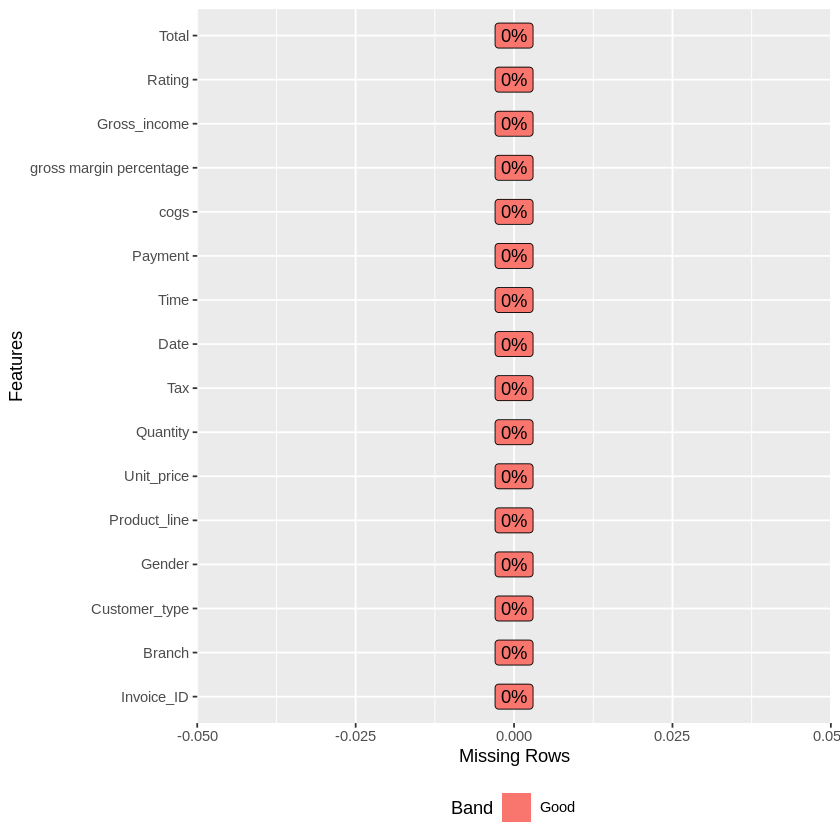

In [15]:
# a visualization to show percentage of missing values in our data set
plot_missing(supermarket)

There are no missing values

In [16]:
# drop 'gross margin percentage' column
supermarket <- supermarket[, -13]
dim(supermarket)

[1] 1000   15

In [17]:
# check for outliers in numeric columns
numerical <- supermarket[ , c('Unit_price', 'Quantity', 'Tax', 'cogs', 'Gross_income', 'Rating', 'Total')]
head(numerical)
dim(numerical)

Unit_price,Quantity,Tax,cogs,Gross_income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74.69,7,26.1415,522.83,26.1415,9.1,548.9715
15.28,5,3.8200,76.40,3.8200,9.6,80.2200
46.33,7,16.2155,324.31,16.2155,7.4,340.5255
58.22,8,23.2880,465.76,23.2880,8.4,489.0480
86.31,7,30.2085,604.17,30.2085,5.3,634.3785
85.39,7,29.8865,597.73,29.8865,4.1,627.6165


[1] 1000    7

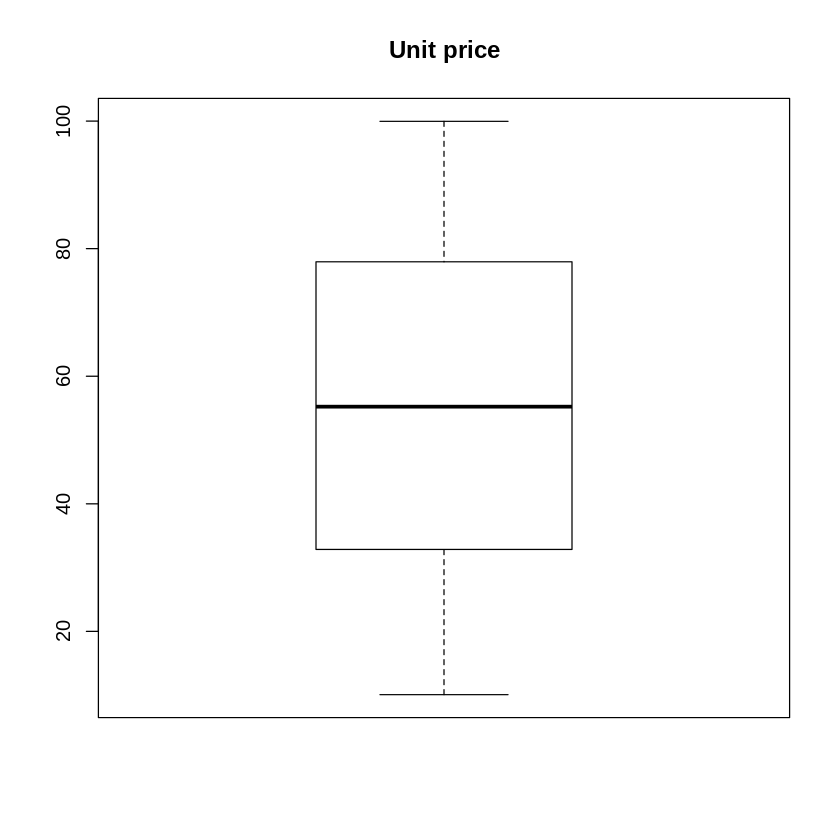

In [18]:
# checking outliers in 'Unit price'
boxplot(numerical[,1], main='Unit price')

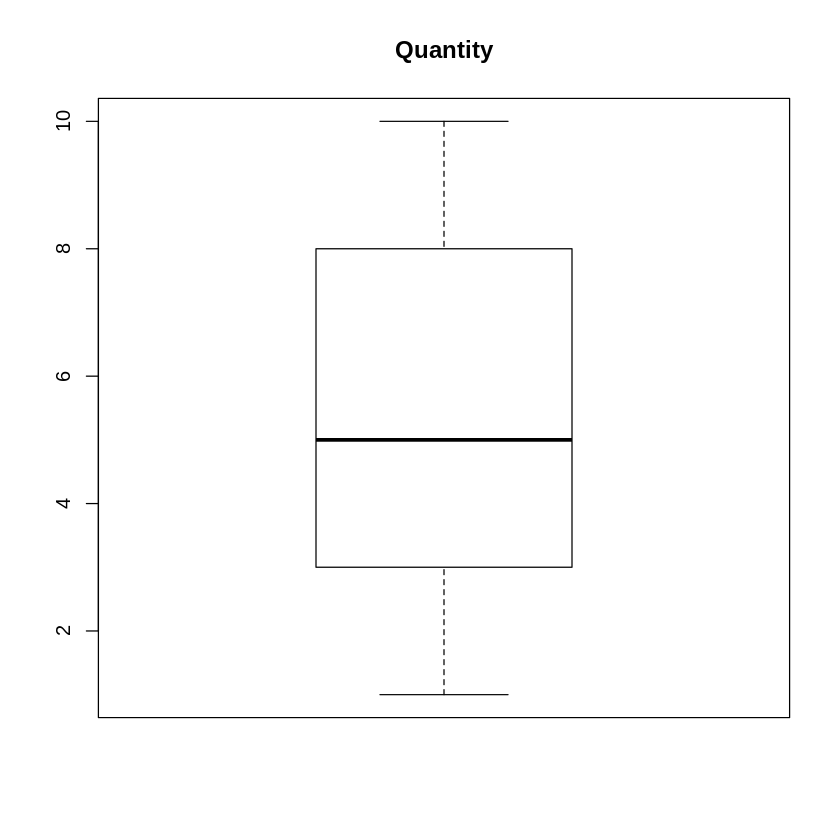

In [19]:
# checking outliers in 'Quantity'
boxplot(numerical[,2], main='Quantity')

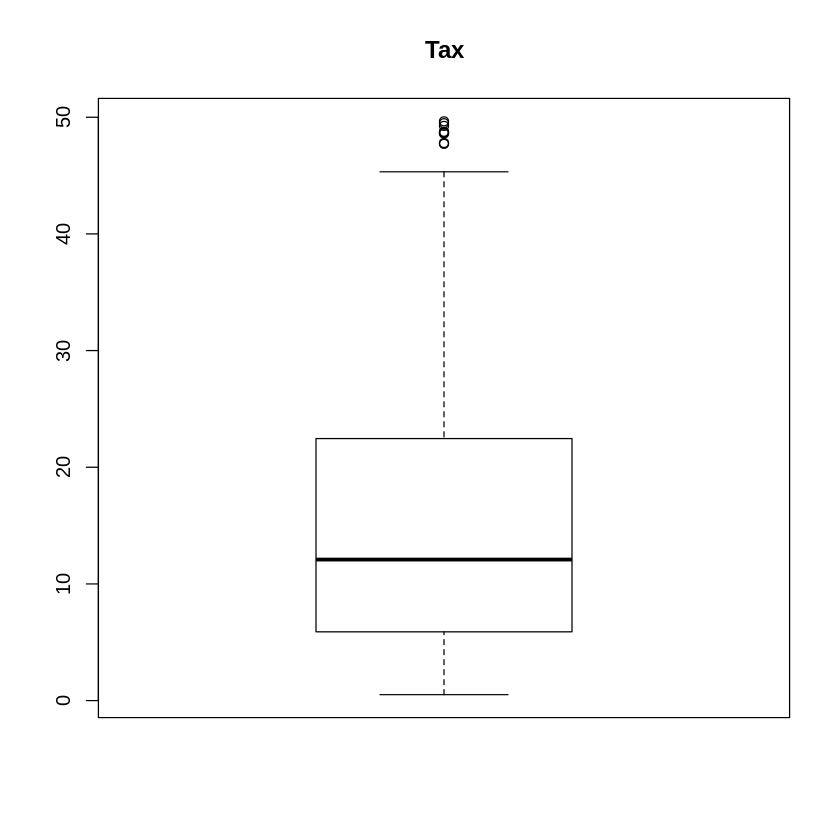

In [20]:
# checking outliers in 'Tax'
boxplot(numerical[,3], main='Tax')

In [21]:
# check tax outlier values
boxplot.stats(numerical$Tax)$out

# filter rows with outliers
supermarket_version <- filter(supermarket, Tax < 47.71)

[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

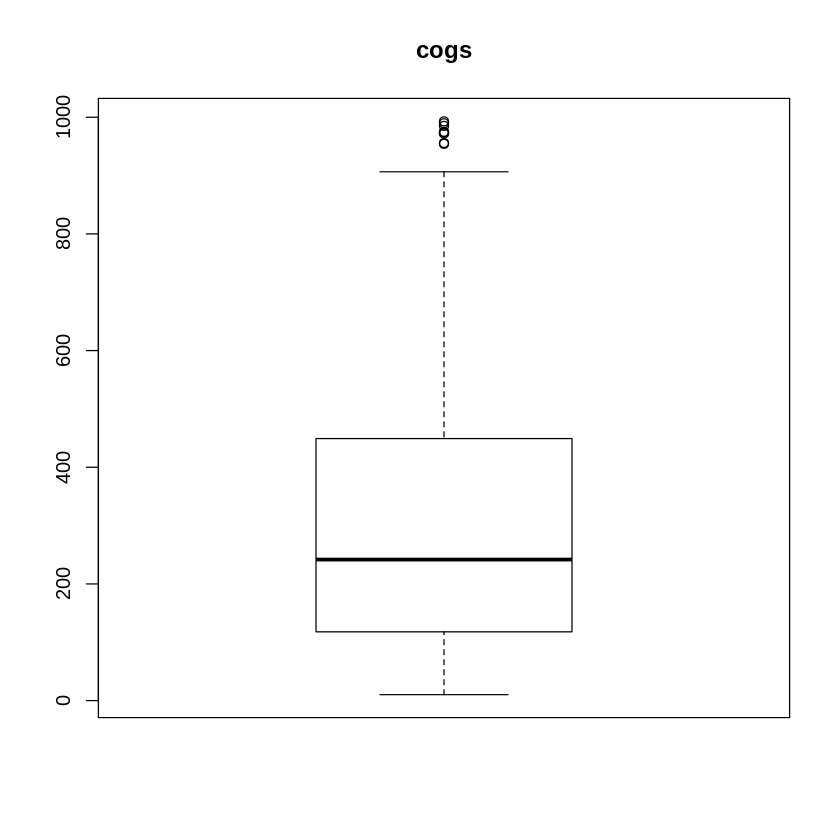

In [22]:
# checking outliers in 'cogs'
boxplot(numerical[,4], main='cogs')

In [23]:
# check cogs outlier values
boxplot.stats(numerical$cogs)$out

# filter rows with outliers
supermarket_version <- filter(supermarket, cogs < 954.3)

[1] 955.8 989.8 993.0 954.4 972.1 985.2 975.0 973.7 973.8

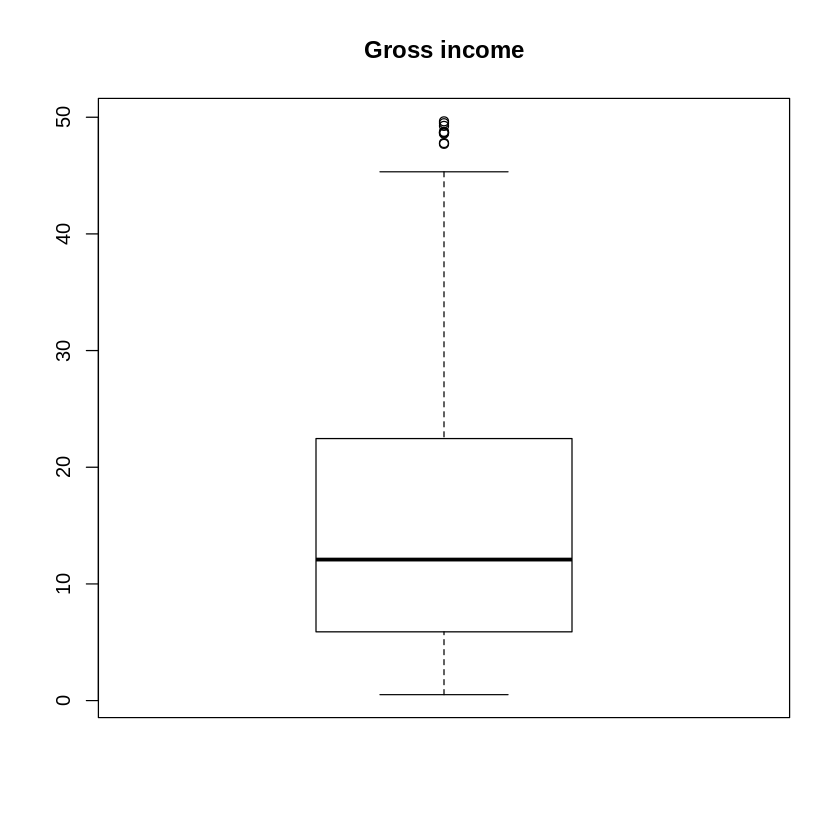

In [24]:
# checking outliers in 'Gross income'
boxplot(numerical[,5], main='Gross income')

In [25]:
# check tGross income outlier values
boxplot.stats(numerical$Gross_income)$out

# filter rows with outliers
supermarket_version <- filter(supermarket, Gross_income < 954.3)

[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

In [26]:
# check if columns are duplicated
tax_gross <- supermarket[, c(8, 13)]
print(unique(tax_gross$Tax == tax_gross$Gross_income))

[1] TRUE


In [27]:
# drop Tax column
supermarket_version <- supermarket[-c(8)]
names(supermarket_version)

[1] "Invoice_ID"    "Branch"        "Customer_type" "Gender"       
 [5] "Product_line"  "Unit_price"    "Quantity"      "Date"         
 [9] "Time"          "Payment"       "cogs"          "Gross_income" 
[13] "Rating"        "Total"

'Tax' and 'Gross income' are duplicated so I dropped the 'Tax' column.

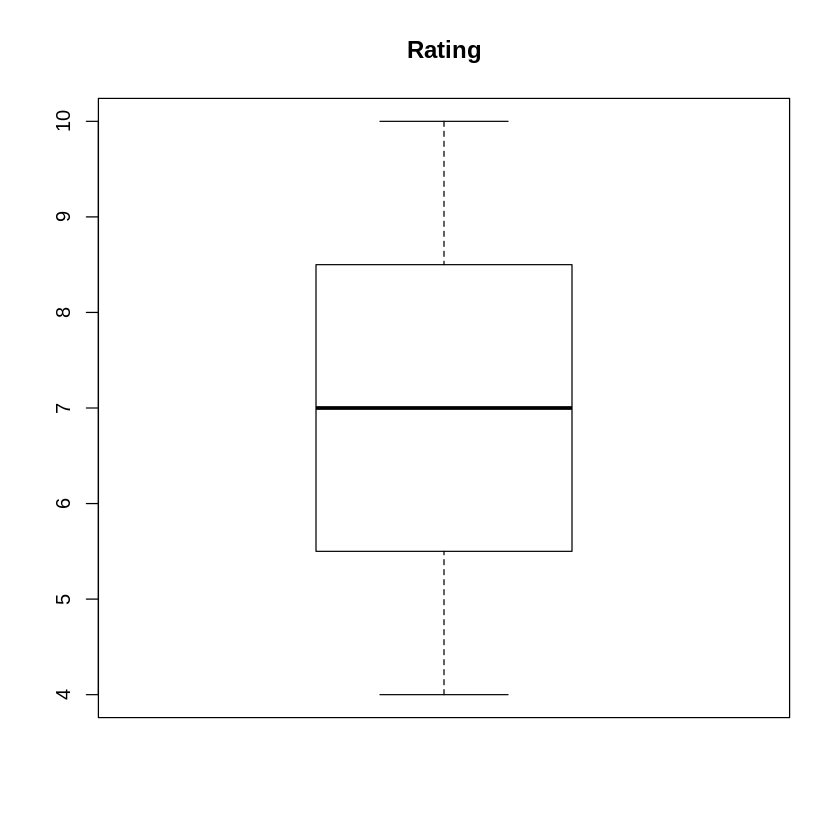

In [28]:
# checking outliers in 'Rating'
boxplot(numerical[,6], main='Rating')

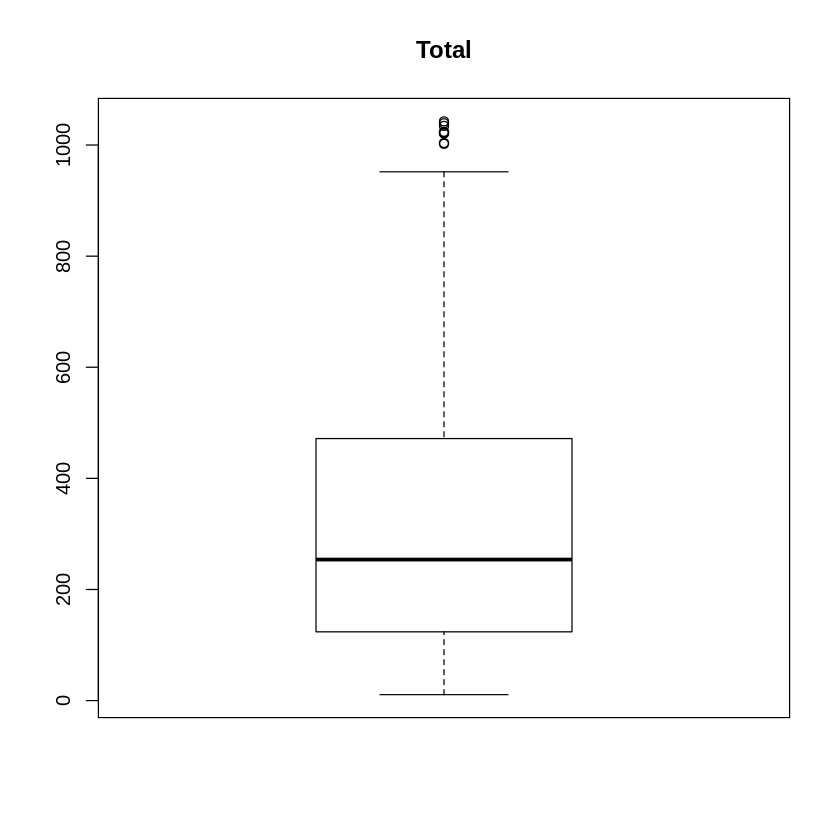

In [29]:
# checking outliers in 'Total'
boxplot(numerical[,7], main='Total')

In [30]:
# check tax outlier values
boxplot.stats(numerical$Total)$out

# filter rows with outliers
supermarket_version <- filter(supermarket_version, Total < 1000)

[1] 1003.590 1039.290 1042.650 1002.120 1020.705 1034.460 1023.750 1022.385
[9] 1022.490

Akk outliers were effectivly removed.

In [31]:
# preview cleaned data
head(supermarket_version)
dim(supermarket_version)

Invoice_ID,Branch,Customer_type,Gender,Product_line,Unit_price,Quantity,Date,Time,Payment,cogs,Gross_income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,522.83,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,76.40,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,324.31,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,465.76,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,604.17,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,3/25/2019,18:30:00,Ewallet,597.73,29.8865,4.1,627.6165


[1] 991  14

In [32]:
# change categorical variables to factors
supermarket_version$Branch <- factor(supermarket_version$Branch)
supermarket_version$Customer_type <- factor(supermarket_version$Customer_type)
supermarket_version$Gender <- factor(supermarket_version$Gender)
supermarket_version$Product_line <- factor(supermarket_version$Product_line)
supermarket_version$Payment <- factor(supermarket_version$Payment)

In [33]:
# encode categorical variables
categorical <- supermarket_version[,c('Branch','Customer_type','Gender','Product_line','Payment')]
encoded_cat <- data.matrix(categorical)
head(encoded_cat)

Branch,Customer_type,Gender,Product_line,Payment
1,1,1,4,3
3,2,1,1,1
1,2,2,5,2
1,1,2,4,3
1,2,2,6,3
3,2,2,1,3


In [34]:
# replace categorical variables with encoded columns
selected<- supermarket_version[c('Invoice_ID','Unit_price','Quantity','Date','Time','cogs','Gross_income','Rating','Total')]

version1 <- cbind(selected, encoded_cat) # merge the two data frames
head(version1)

,Invoice_ID,Unit_price,Quantity,Date,Time,cogs,Gross_income,Rating,Total,Branch,Customer_type,Gender,Product_line,Payment
,<chr>,<dbl>,<dbl>,<chr>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,750-67-8428,74.69,7,1/5/2019,13:08:00,522.83,26.1415,9.1,548.9715,1,1,1,4,3
2,226-31-3081,15.28,5,3/8/2019,10:29:00,76.40,3.8200,9.6,80.2200,3,2,1,1,1
3,631-41-3108,46.33,7,3/3/2019,13:23:00,324.31,16.2155,7.4,340.5255,1,2,2,5,2
4,123-19-1176,58.22,8,1/27/2019,20:33:00,465.76,23.2880,8.4,489.0480,1,1,2,4,3
5,373-73-7910,86.31,7,2/8/2019,10:37:00,604.17,30.2085,5.3,634.3785,1,2,2,6,3
6,699-14-3026,85.39,7,3/25/2019,18:30:00,597.73,29.8865,4.1,627.6165,3,2,2,1,3


## 4. Perform Exploratory Data Analysis

### Univariate Analysis

In [35]:
# check for outliers in numeric columns
numerical <- supermarket_version[ , purrr::map_lgl(supermarket_version, is.numeric)]
dim(numerical)

[1] 991   6

In [36]:
# install package data.table to work with data tables
install.packages("data.table") 
library(data.table)

install.packages('moments') # for dispersion measures
library(moments)

install.packages("corrplot") # for correlations
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



In [37]:
# get a summary fo the data
summary(supermarket_version)

  Invoice_ID        Branch  Customer_type    Gender   
 Length:991         A:339   Member:498    Female:495  
 Class :character   B:330   Normal:493    Male  :496  
 Mode  :character   C:322                             
                                                      
                                                      
                                                      
                 Product_line   Unit_price       Quantity     
 Electronic accessories:170   Min.   :10.08   Min.   : 1.000  
 Fashion accessories   :175   1st Qu.:32.66   1st Qu.: 3.000  
 Food and beverages    :173   Median :54.84   Median : 5.000  
 Health and beauty     :152   Mean   :55.29   Mean   : 5.469  
 Home and lifestyle    :156   3rd Qu.:77.48   3rd Qu.: 8.000  
 Sports and travel     :165   Max.   :99.96   Max.   :10.000  
     Date               Time                 Payment         cogs       
 Length:991         Length:991        Cash       :342   Min.   : 10.17  
 Class :character   Class1:h

The data summary provides information on the value ranges (min, max), the quantiles, mean, median, and modes.

In [38]:
# convert selected columns to a data table
numerical <- data.table(numerical) 

In [39]:
# check standard deviation of numeric columns
numerical[,lapply(.SD, sd)]

Unit_price,Quantity,cogs,Gross_income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.31162,2.905031,226.3901,11.3195,1.716957,237.7096


In [40]:
# check variance of numeric columns
numerical[,lapply(.SD, var)]

Unit_price,Quantity,cogs,Gross_income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
692.3013,8.439203,51252.47,128.1312,2.947942,56505.85


In [41]:
head(numerical)

Unit_price,Quantity,cogs,Gross_income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74.69,7,522.83,26.1415,9.1,548.9715
15.28,5,76.40,3.8200,9.6,80.2200
46.33,7,324.31,16.2155,7.4,340.5255
58.22,8,465.76,23.2880,8.4,489.0480
86.31,7,604.17,30.2085,5.3,634.3785
85.39,7,597.73,29.8865,4.1,627.6165


[1] 0.01401477

[1] 1.789507

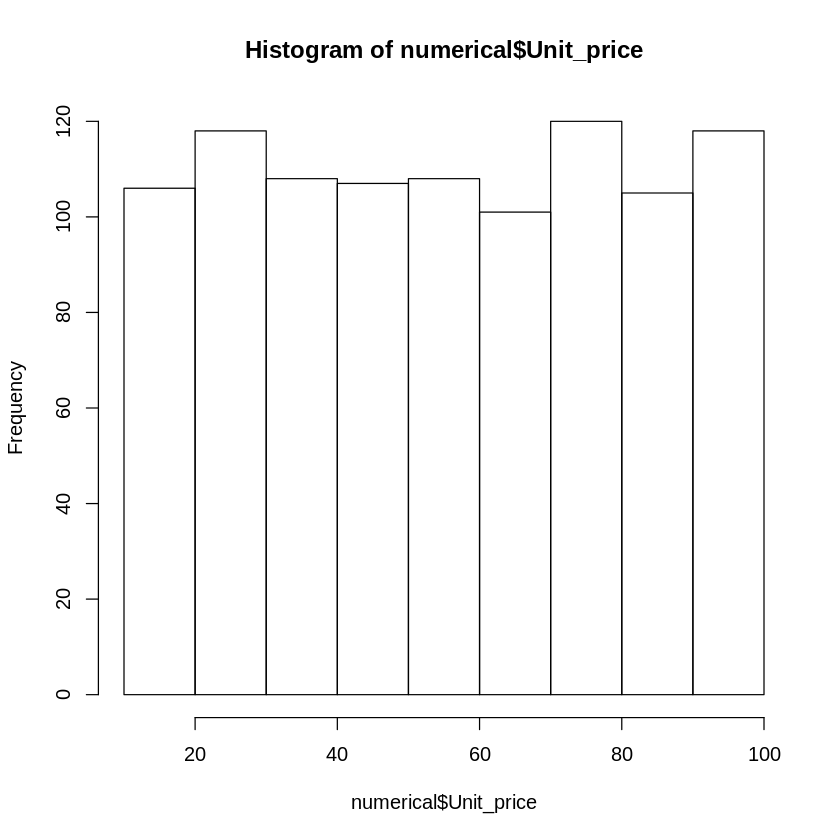

In [42]:
# check 'unit price' distribution
hist(numerical$Unit_price)
skewness(numerical$Unit_price)
kurtosis(numerical$Unit_price)

[1] 0.02184004

[1] 1.794938

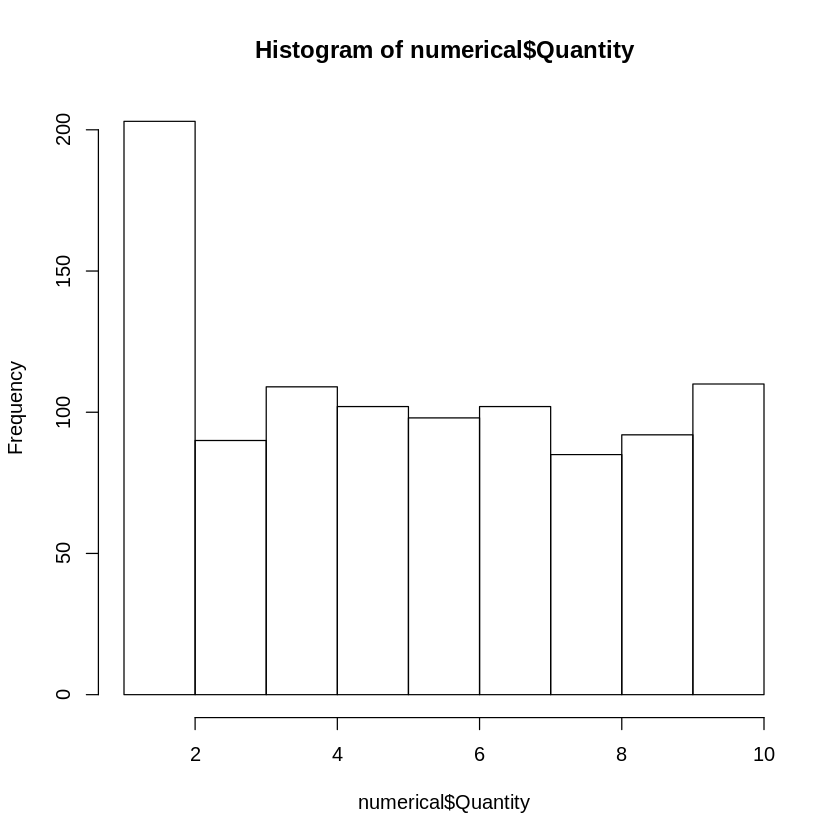

In [43]:
# check 'Quantity' distribution
hist(numerical$Quantity)
skewness(numerical$Quantity)
kurtosis(numerical$Quantity)

[1] 0.8426702

[1] 2.762815

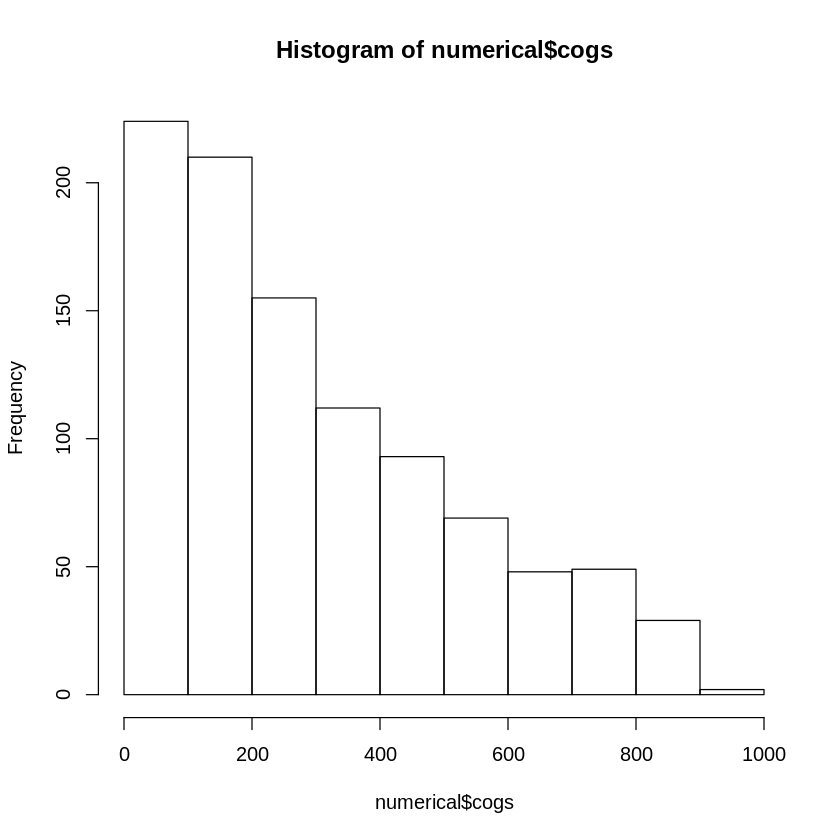

In [44]:
# check 'cogs' distribution
hist(numerical$cogs)
skewness(numerical$cogs)
kurtosis(numerical$cogs)

[1] 0.8426702

[1] 2.762815

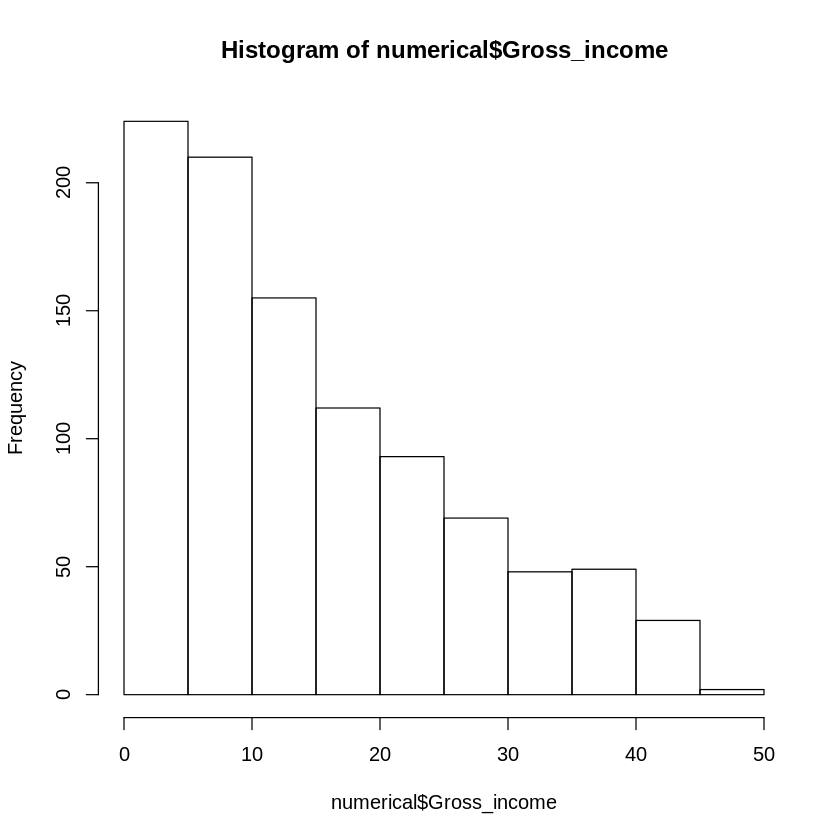

In [45]:
# check 'Gross income' distribution
hist(numerical$Gross_income)
skewness(numerical$Gross_income)
kurtosis(numerical$Gross_income)

[1] 0.00592866

[1] 1.854314

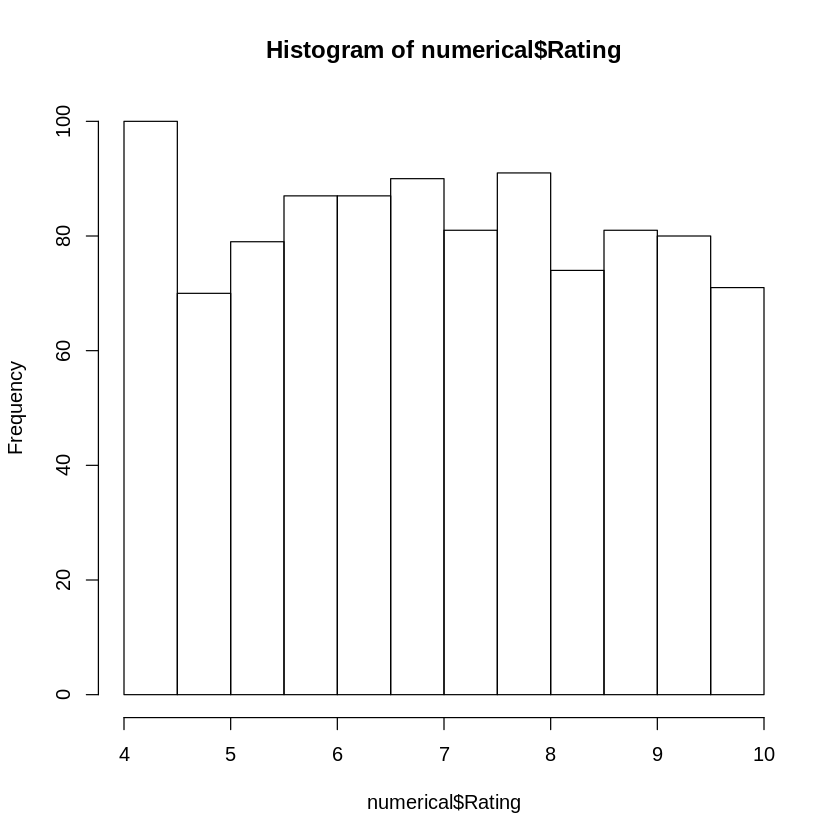

In [46]:
# check 'Rating' distribution
hist(numerical$Rating)
skewness(numerical$Rating)
kurtosis(numerical$Rating)

[1] 0.8426702

[1] 2.762815

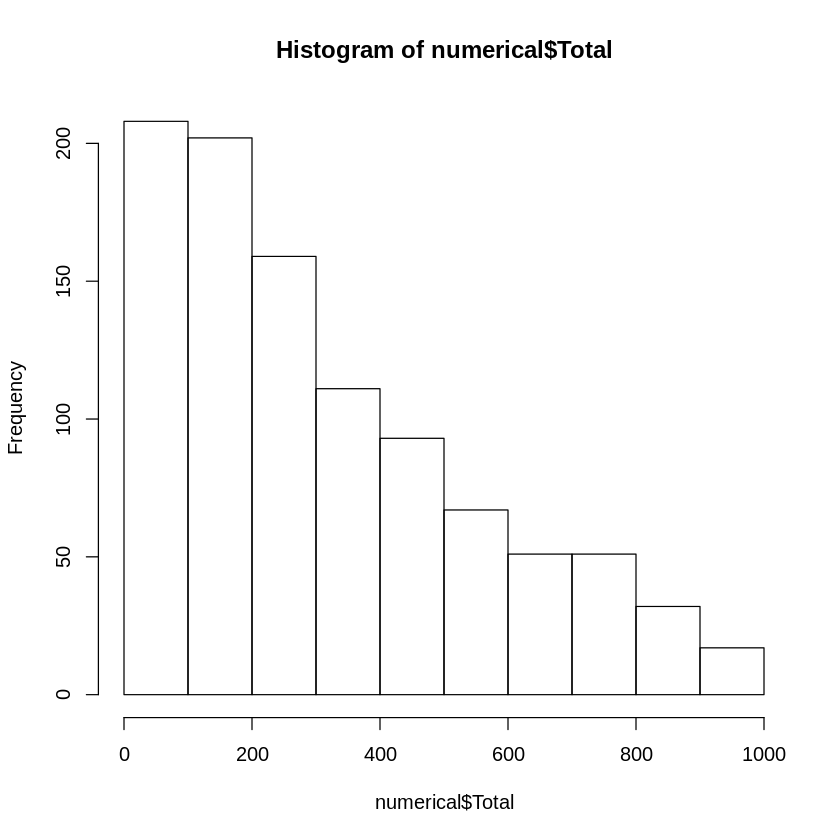

In [47]:
# check 'Total' distribution
hist(numerical$Total)
skewness(numerical$Total)
kurtosis(numerical$Total)

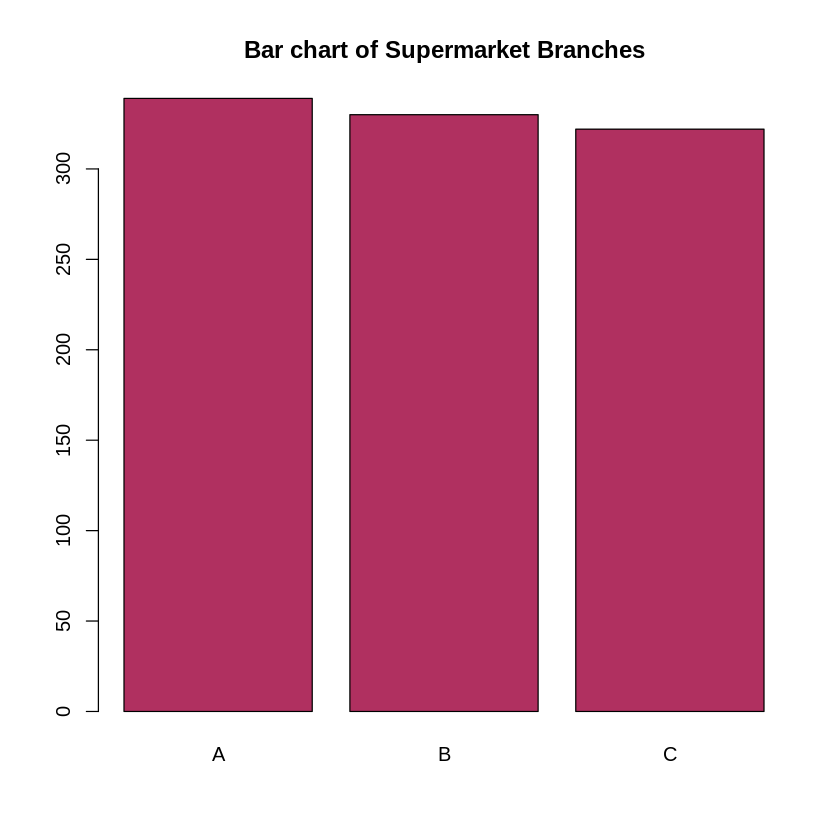

In [48]:
# check activity across carrefour branches
barplot(table(supermarket_version$Branch), col = "maroon", main = "Bar chart of Supermarket Branches")

Branch A has the most activity  but there is very little difference betweeb them.

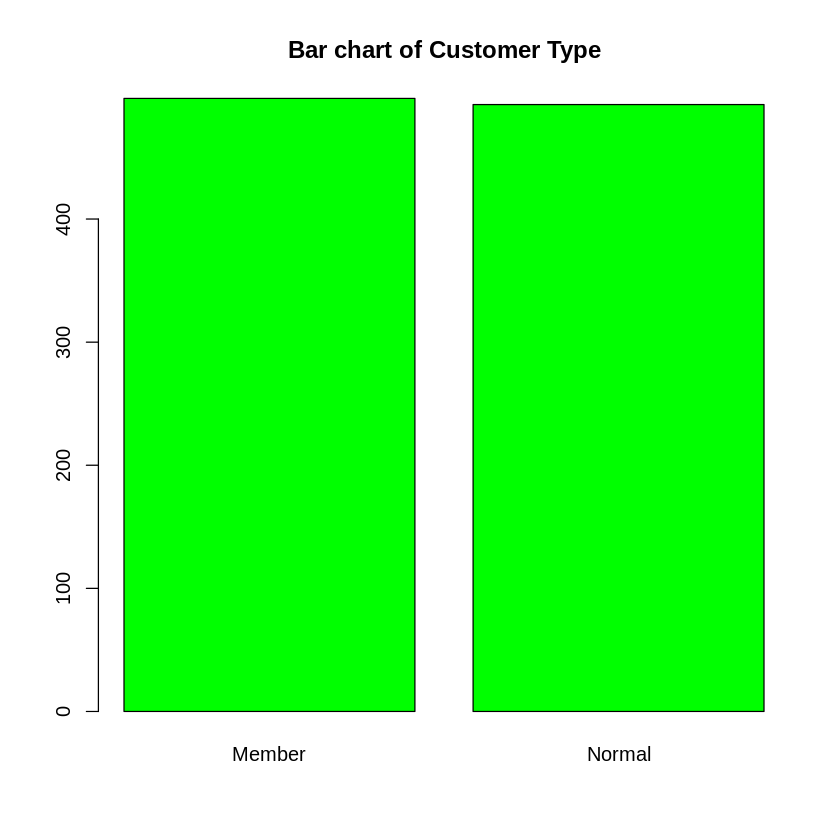

In [49]:
# check customer types
barplot(table(supermarket_version$Customer_type), col = "green", main = "Bar chart of Customer Type")

Transactions between the members and non-members are equally matched.

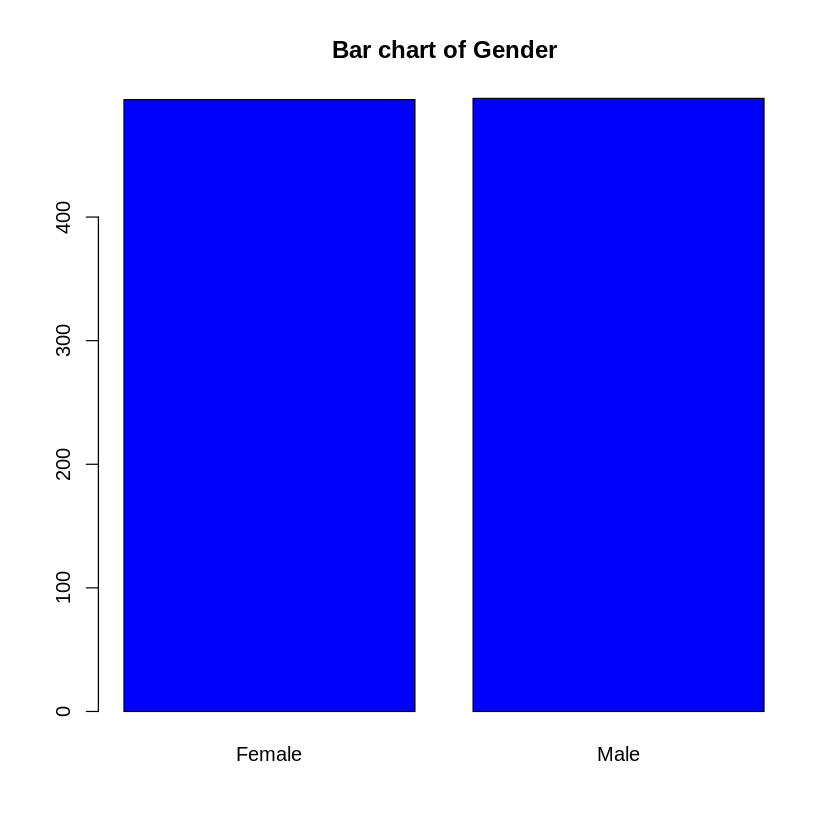

In [50]:
# check gender count
barplot(table(supermarket_version$Gender), col = "blue", main = "Bar chart of Gender")

[1] Health and beauty      Electronic accessories Home and lifestyle    
[4] Sports and travel      Food and beverages     Fashion accessories   
6 Levels: Electronic accessories Fashion accessories ... Sports and travel

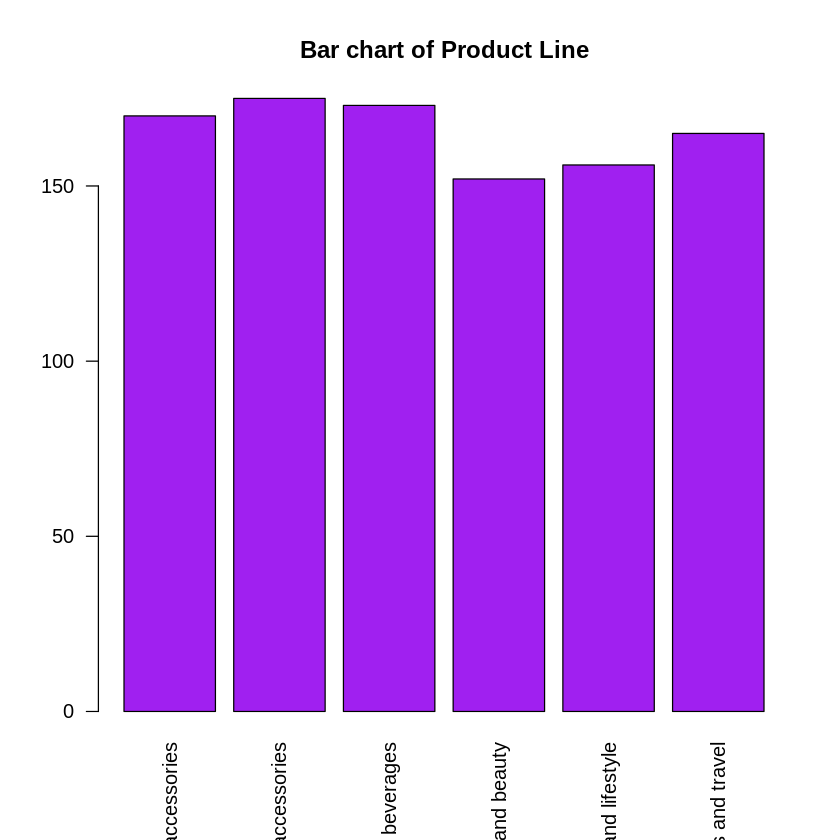

In [51]:
# check product_line popularity
barplot(table(supermarket_version$Product_line), col = "purple", main = "Bar chart of Product Line", las=2)
unique(supermarket_version$Product_line)

Electronics and accessories and food and berverages are the most popular product lines.

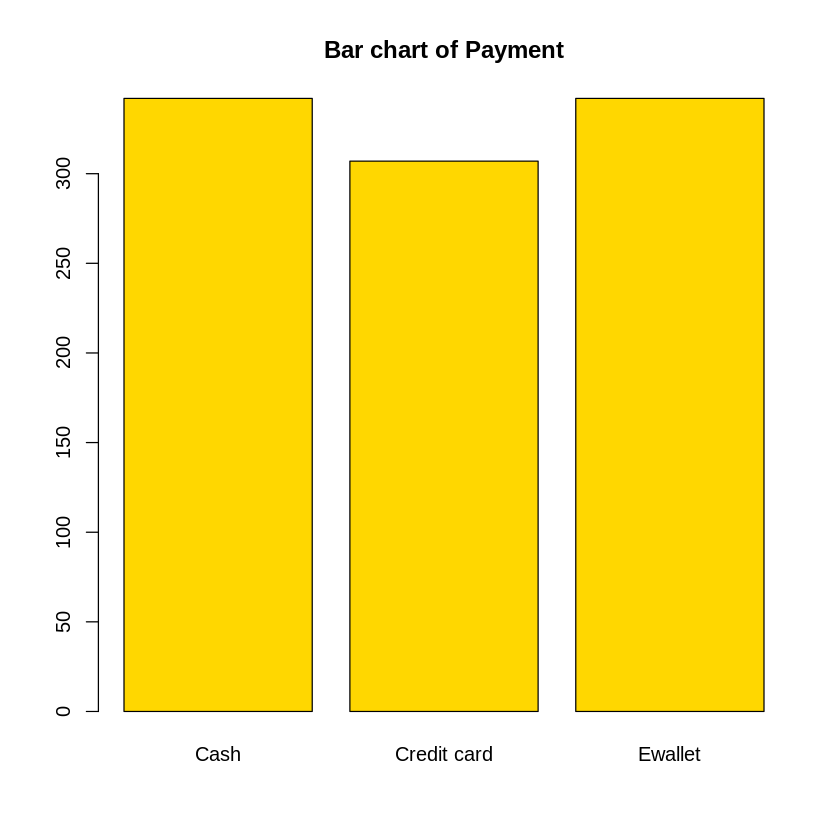

In [52]:
# check types of payment used
barplot(table(supermarket_version$Payment), col = "gold", main = "Bar chart of Payment")

Most of the customers transact using their ewallet or using cash.

### Bivariate Analysis

In [53]:
# check covariance between numerical variables
numerical <- numerical[, -2]
cov(numerical)

,Unit_price,cogs,Gross_income,Rating,Total
Unit_price,692.3012954,3713.13080,185.6565399,-0.1141496,3898.78734
cogs,3713.1307989,51252.47066,2562.6235328,-10.1418742,53815.09419
Gross_income,185.6565399,2562.62353,128.1311766,-0.5070937,2690.75471
Rating,-0.1141496,-10.14187,-0.5070937,2.9479417,-10.64897
Total,3898.7873388,53815.09419,2690.7547095,-10.6489679,56505.84890


In [54]:
# check correlation between numerical variables
cor(numerical)

,Unit_price,cogs,Gross_income,Rating,Total
Unit_price,1.00000000,0.62335475,0.62335475,-0.00252678,0.62335475
cogs,0.62335475,1.00000000,1.00000000,-0.02609164,1.00000000
Gross_income,0.62335475,1.00000000,1.00000000,-0.02609164,1.00000000
Rating,-0.00252678,-0.02609164,-0.02609164,1.00000000,-0.02609164
Total,0.62335475,1.00000000,1.00000000,-0.02609164,1.00000000


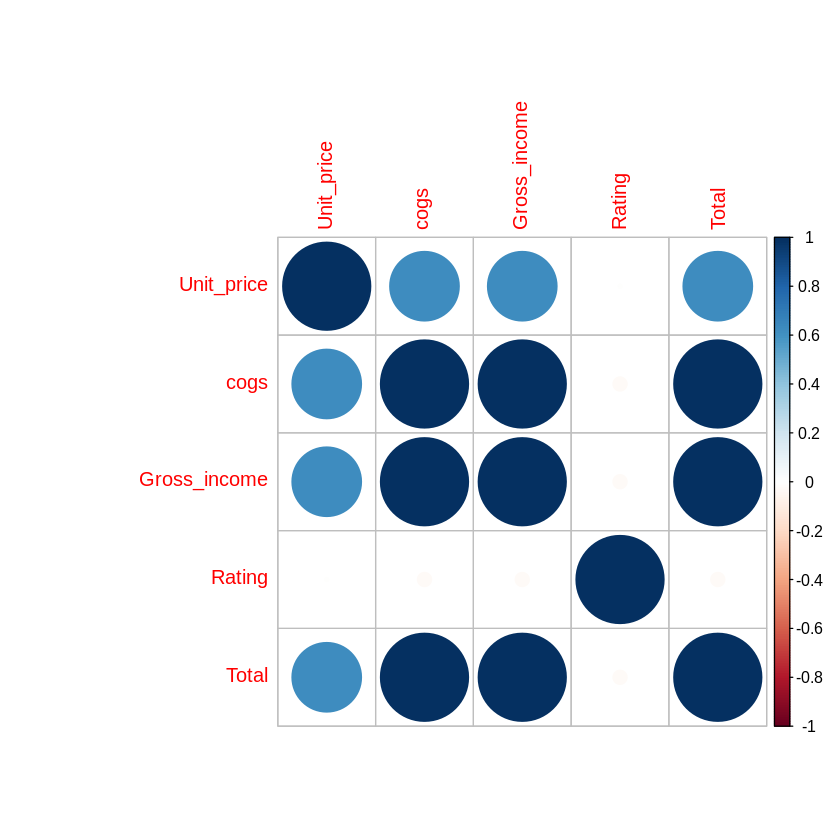

In [55]:
corrplot(cor(numerical))

We observe that most of the variables are perfectly correlated which is problematic in modelling hence the need for feature extraction or feature selection.

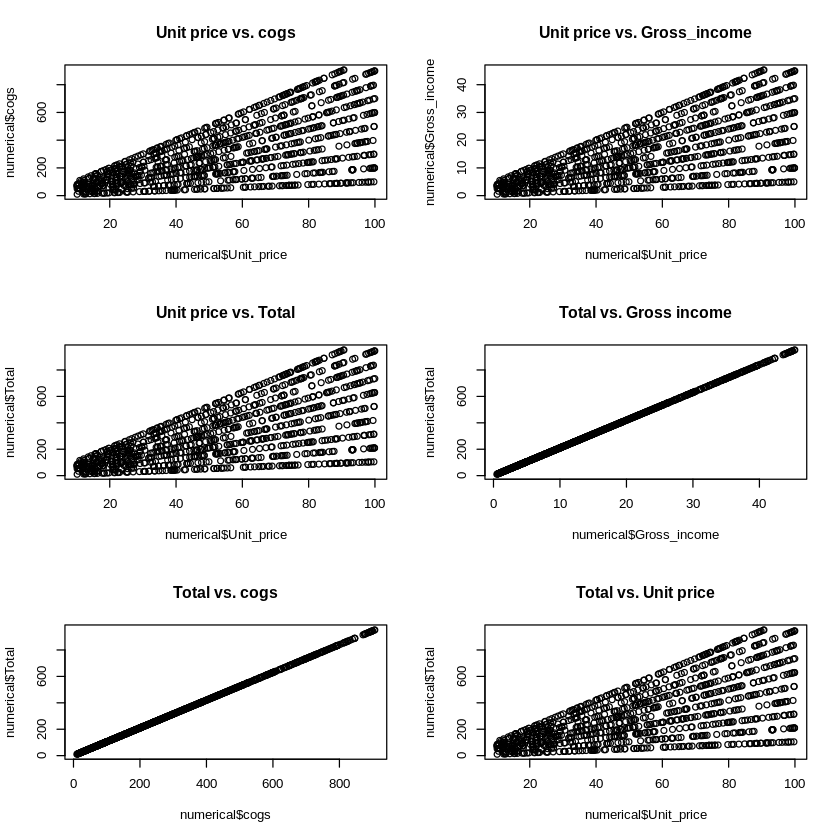

In [56]:
#scatter plots for numerical columns

par(mfrow=c(3,2))
plot(numerical$Unit_price,numerical$cogs, main="Unit price vs. cogs")
plot(numerical$Unit_price,numerical$Gross_income, main="Unit price vs. Gross_income")
plot(numerical$Unit_price,numerical$Total, main="Unit price vs. Total")
plot(numerical$Gross_income,numerical$Total, main="Total vs. Gross income")
plot(numerical$cogs, numerical$Total, main="Total vs. cogs")
plot(numerical$Unit_price, numerical$Total, main="Total vs. Unit price")

The scatter plots indicate some of the stong correlations that were observed.

## Implementing the solution

## Dimensionality Reduction



In [57]:
# installing our ggbiplot visualisation package
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)

Loading required package: usethis




farver    (2.0.1 -> 2.0.3 ) [CRAN]
backports (1.1.9 -> 1.1.10) [CRAN]
rprojroot (1.2   -> 1.3-2 ) [CRAN]


Installing 3 packages: farver, backports, rprojroot

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpORS7mc/remotes6532049dac/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:purrr’:

    compact


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: grid



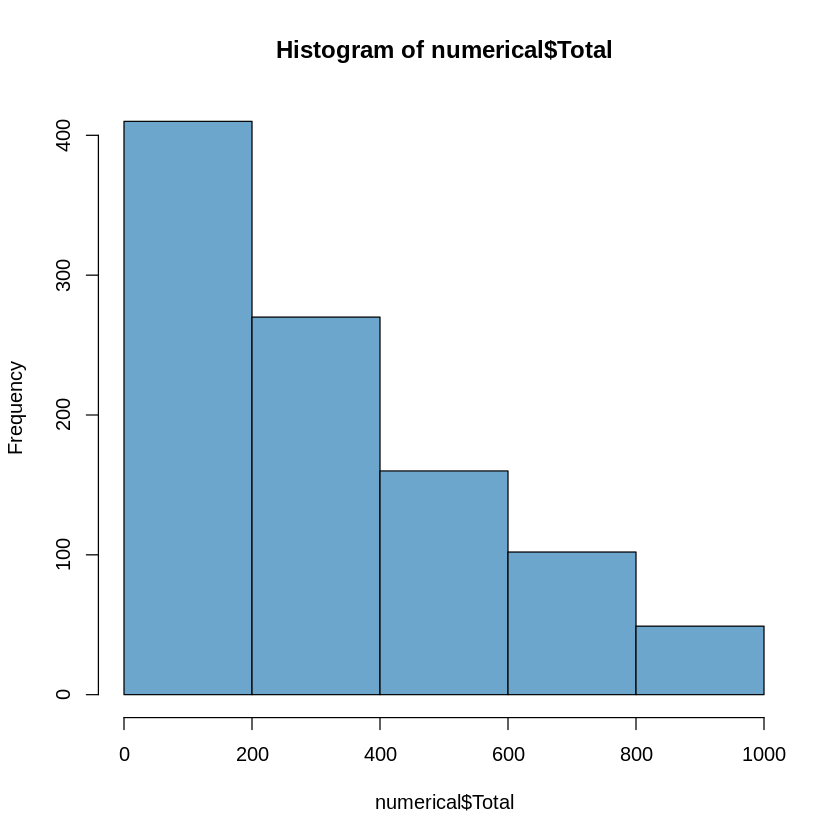

In [58]:
# create label variable using total
# examine distribution to determine bin size
hist(numerical$Total, col = 'skyblue3', breaks=4)

In [59]:
# create label variable using total (low, medium, high)
version1$Label <- cut(version1$Total, c(0,300,700,1000))
levels(version1$Label) <- c('Low', 'Medium', 'High')
head(version1, 10)

,Invoice_ID,Unit_price,Quantity,Date,Time,cogs,Gross_income,Rating,Total,Branch,Customer_type,Gender,Product_line,Payment,Label
,<chr>,<dbl>,<dbl>,<chr>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
1,750-67-8428,74.69,7,1/5/2019,13:08:00,522.83,26.1415,9.1,548.9715,1,1,1,4,3,Medium
2,226-31-3081,15.28,5,3/8/2019,10:29:00,76.40,3.8200,9.6,80.2200,3,2,1,1,1,Low
3,631-41-3108,46.33,7,3/3/2019,13:23:00,324.31,16.2155,7.4,340.5255,1,2,2,5,2,Medium
4,123-19-1176,58.22,8,1/27/2019,20:33:00,465.76,23.2880,8.4,489.0480,1,1,2,4,3,Medium
5,373-73-7910,86.31,7,2/8/2019,10:37:00,604.17,30.2085,5.3,634.3785,1,2,2,6,3,Medium
6,699-14-3026,85.39,7,3/25/2019,18:30:00,597.73,29.8865,4.1,627.6165,3,2,2,1,3,Medium
7,355-53-5943,68.84,6,2/25/2019,14:36:00,413.04,20.6520,5.8,433.6920,1,1,1,1,3,Medium
8,315-22-5665,73.56,10,2/24/2019,11:38:00,735.60,36.7800,8.0,772.3800,3,2,1,5,3,High
9,665-32-9167,36.26,2,1/10/2019,17:15:00,72.52,3.6260,7.2,76.1460,1,1,1,4,2,Low


In [60]:
# check label 
is.factor(version1$Label)

[1] TRUE

In [61]:
# drop total column
version2 <- version1[-c(9)]
names(version2)

[1] "Invoice_ID"    "Unit_price"    "Quantity"      "Date"         
 [5] "Time"          "cogs"          "Gross_income"  "Rating"       
 [9] "Branch"        "Customer_type" "Gender"        "Product_line" 
[13] "Payment"       "Label"

Since PCA is a parametric model we need to passs variables that are linearly correlated. It also works best with continuous variables.

In [62]:
# select numeric columns for PCA
numeric_cols <- version2[c(2,3,6,7,8)]
head(numeric_cols)

# assign label to a variable
Labels<-version2$Label

,Unit_price,Quantity,cogs,Gross_income,Rating
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,522.83,26.1415,9.1
2,15.28,5,76.40,3.8200,9.6
3,46.33,7,324.31,16.2155,7.4
4,58.22,8,465.76,23.2880,8.4
5,86.31,7,604.17,30.2085,5.3
6,85.39,7,597.73,29.8865,4.1


In [63]:
# implement PCA with prcomp
carr4.pca <- prcomp(version2[c(2,3,6,7,8)], center = TRUE, scale. = TRUE)
summary(carr4.pca)

Importance of components:
                          PC1    PC2    PC3    PC4       PC5
Standard deviation     1.7068 1.0065 0.9990 0.2757 1.921e-16
Proportion of Variance 0.5826 0.2026 0.1996 0.0152 0.000e+00
Cumulative Proportion  0.5826 0.7852 0.9848 1.0000 1.000e+00

Having implmented PCA, we observe that most of the variability in our data can be explained by the first 3 principal components which have account for 98.48%.

In [64]:
# check PCA object
str(carr4.pca)

List of 5
 $ sdev    : num [1:5] 1.71 1.01 9.99e-01 2.76e-01 1.92e-16
 $ rotation: num [1:5, 1:5] -0.377 -0.4235 -0.5823 -0.5823 0.0185 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "Unit_price" "Quantity" "cogs" "Gross_income" ...
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:5] 55.29 5.47 301.53 15.08 6.98
  ..- attr(*, "names")= chr [1:5] "Unit_price" "Quantity" "cogs" "Gross_income" ...
 $ scale   : Named num [1:5] 26.31 2.91 226.39 11.32 1.72
  ..- attr(*, "names")= chr [1:5] "Unit_price" "Quantity" "cogs" "Gross_income" ...
 $ x       : num [1:991, 1:5] -1.617 1.828 -0.207 -1.24 -2.243 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


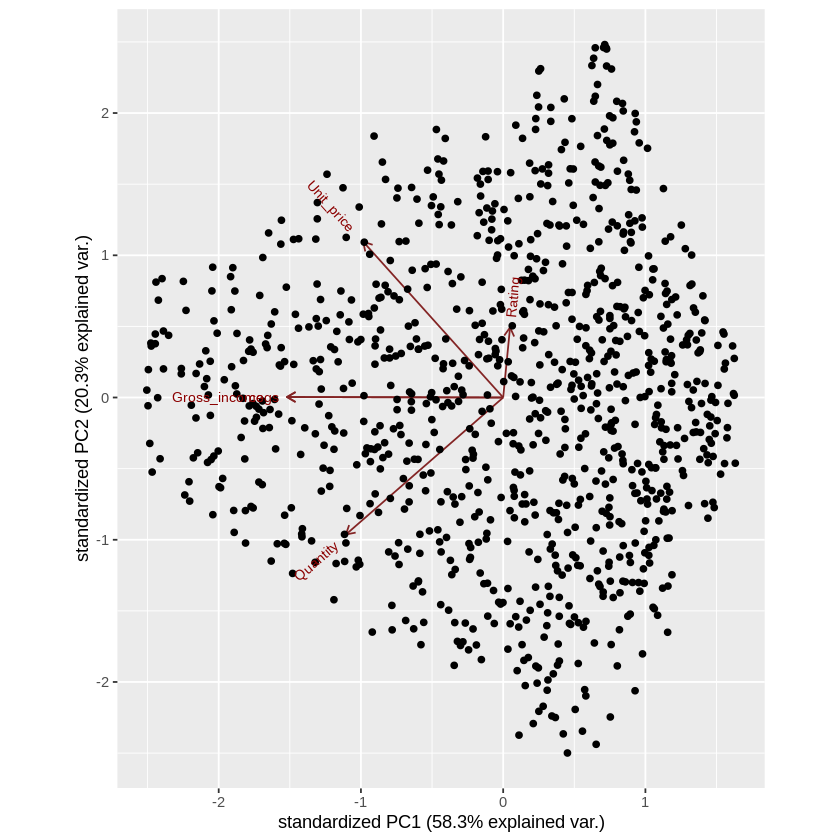

In [65]:
# plot PCA graph
ggbiplot(carr4.pca)

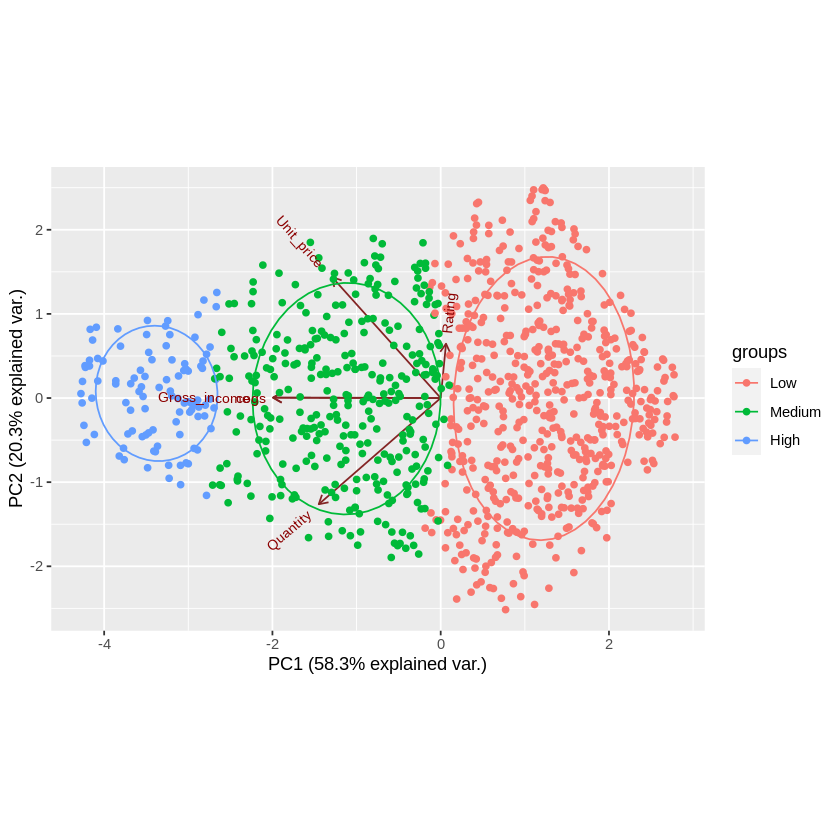

In [66]:
# plot PCA graph for pc1 and pc2
ggbiplot(carr4.pca, ellipse=TRUE, groups=Labels, obs.scale = 1, var.scale = 1)

From the plot, we observe that the variables that contribute the most are 'Gross_income', 'Unit_price', 'Quantity', and 'Unit price'. 

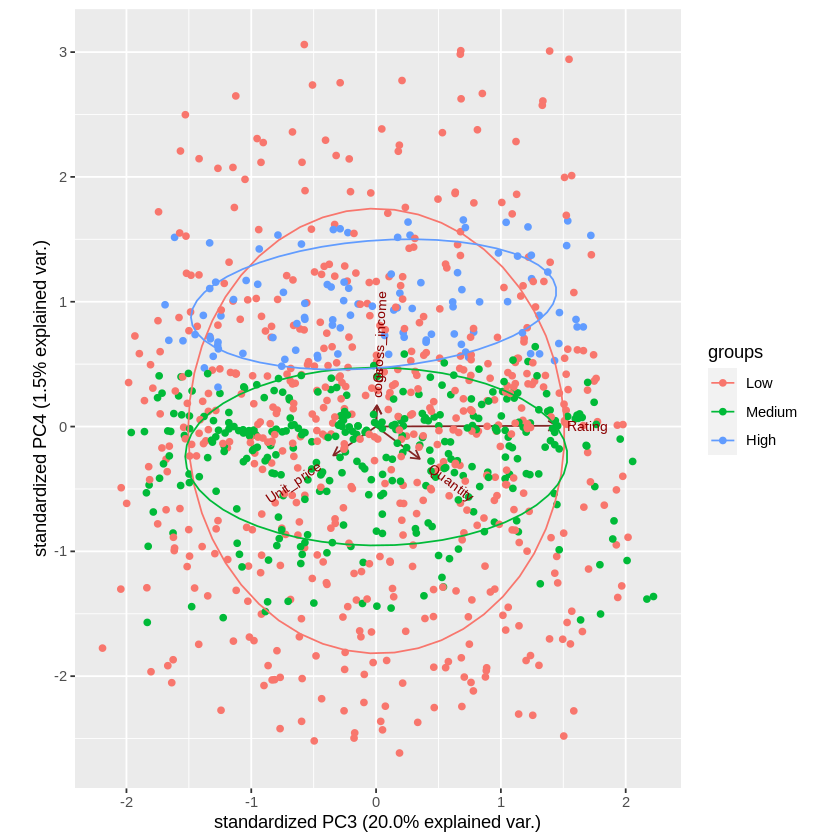

In [67]:
# plot contribution of pc3 and pc4
ggbiplot(carr4.pca,ellipse=TRUE,choices=c(3,4), groups=Labels)

This plot indicates that the thrid and fourth principal components contribute little to our analysis as it is difficult to interpret the points distribution.

## Feature Selection

This section is implemented independent of the findings from implmenting the PCA technique.

### Filter method

In [68]:
# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [69]:
# Calculating the correlation matrix
# ---
#
numeric_cols <- version1[c(2,3,6,7,8)]
correlationMatrix <- cor(numeric_cols)

# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes
# ---
# 
highlyCorrelated

names(numeric_cols[highlyCorrelated])

[1] 3

[1] "cogs"

We observe that 'cogs' is highly correlated with the other features.

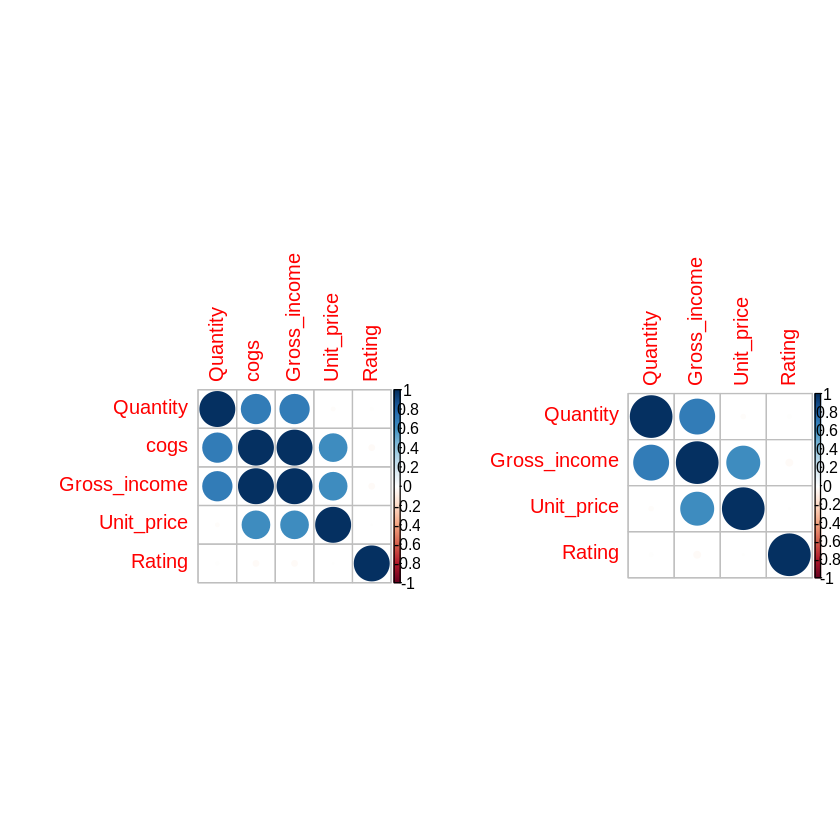

In [70]:
# Removing Redundant Features 
# ---
# 
numeric_cols1<-numeric_cols[-highlyCorrelated]

# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))

corrplot(correlationMatrix, order = "hclust")
corrplot(cor(numeric_cols1), order = "hclust")

### Embedded method

In [71]:
# We install and load our wskm package
# ---
#
suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

Loading required package: latticeExtra


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer


Loading required package: fpc



In [72]:
# Loading and installing our cluster package
# ---
#
suppressWarnings(
        suppressMessages(if
                         (!require(cluster, quietly=TRUE))
                install.packages("cluster")))
library("cluster")

In [73]:
numeric_cols <- version1[c(2,3,6,7,8)]

In [74]:
set.seed(10)
model <- ewkm(numeric_cols, 3, lambda=3, maxiter=1000)

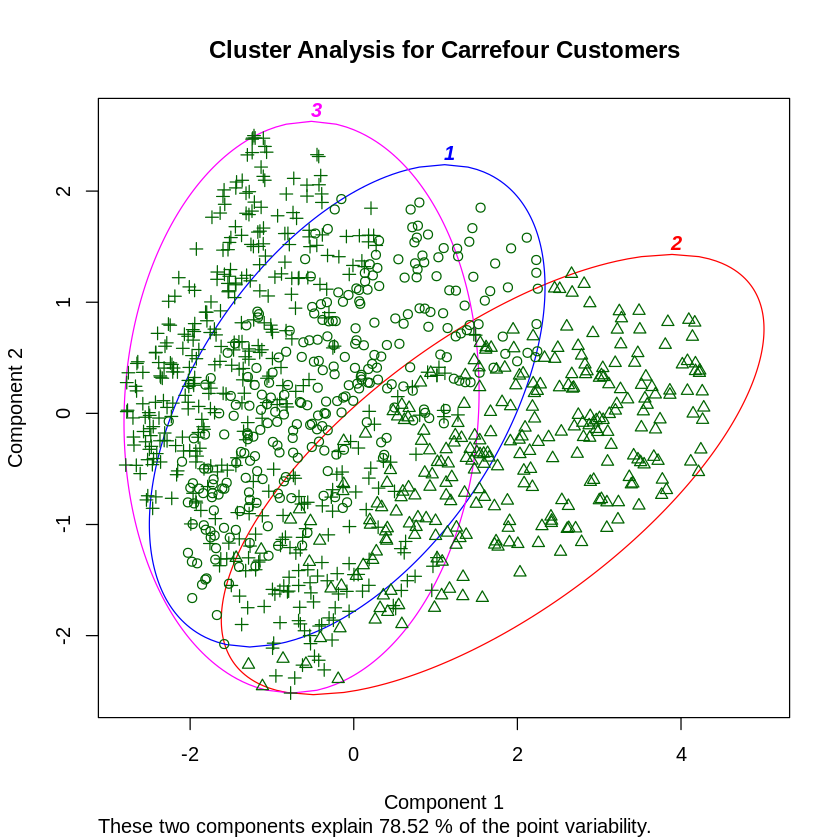

In [75]:
# Cluster Plot against 1st 2 principal components
# ---
#
clusplot(numeric_cols, model$cluster, color=TRUE, shade=F,
         labels=4, lines=1,main='Cluster Analysis for Carrefour Customers')

In [76]:
round(model$weights*100,2)

,Unit_price,Quantity,cogs,Gross_income,Rating
1,0,99.99,0,0,0.00
2,0,99.99,0,0,0.00
3,0,0.00,0,0,99.99


In clustering of the data points, we observe that Quantity is the most important variable in classifying customers that spent more than 800, and those that spent more than 300. while product rating is the most important variable for those that spent below 300.

### Feature Ranking

In [77]:
# We install and load the required packages
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [78]:
numeric_cols <- version1[c(2,3,6,7,8,9)]
names(numeric_cols)

[1] "Unit_price"   "Quantity"     "cogs"         "Gross_income" "Rating"      
[6] "Total"

In [79]:
Scores <- linear.correlation(Total~., numeric_cols)
Scores

,attr_importance
,<dbl>
Unit_price,0.62335475
Quantity,0.69929026
cogs,1.00000000
Gross_income,1.00000000
Rating,0.02609164


In [80]:
Subset <- cutoff.k(Scores, 3)
as.data.frame(Subset)

Subset
<fct>
cogs
Gross_income
Quantity
